# 图像处理基本操作

#1 图像存储

##1.1 RGB颜色空间
- 加法混色
- 3通道：Red通道、Green通道、Blue通道
- 像素值：(b,g,r)
- 取值范围:0~255
![images](../images/12/01.png)

##1.2 CMY(K)颜色空间
- 减法混色，主要用于印刷
- 4通道：Cyan(天蓝)通道、Magenta(玫红)通道、Yellow通道、Key通道
- 像素值:(c,m,y,k)
- 取值范围：0~255
![images](../images/12/02.png)

##1.3 HSV/HSL(I)颜色空间
- 人类视觉概念，画家配色
- 3通道：H/Hue通道(色调，颜色种类)、S/Saturation(饱和度，颜色浓淡)、V/value(明度，颜色明亮度)、L/Lightness(亮度，光照亮度)
- 像素值:(h,s,v/l/i)
- 取值范围:0~255

下图为色调![images](../images/12/03.png)

##1.4 单通道灰度图
$Gray = R*0.3 + G*0.59 + B*0.11$

#2 空域分析及变换
主要涉及滤波与卷积的一些常用操作。在预处理中，叫做滤波；在深度学习中，叫做卷积

在每个图片位置(x,y)上进行基于邻域的函数计算，它可以通过定义不同的函数，得到不同的功能
- 图像增强：平滑去噪，梯度锐化
- 信息提取、检测：边缘、显著点、纹理，模式

可以用一个统一的公式来表达$h[x,y]=\sum_{k,l}f[k,l]I[x+k,y+l]$
- x,y是像素在图片中的位置
- k,l是卷积核中的位置，中心点是(0,0)
- $f[k.l]$是卷积核中在(k,l)上的权重参数
- $I[x+k,y+l]$是与$f[k,l]$相对应的图片像素值
- $h[x,y]$是图片中(x,y)像素的滤波结果
![images](../images/12/04.png)

可以看到生成的图片变小了，那么就需要进行边界补充
- 补零  
- 边界复制
- 镜像
- 块复制
![images](../images/12/05.png)
![images](../images/12/06.png)

图像滤波的目的有两个
- 抽出对象的特征作为图像识别的特征模式
- 为适应图像处理的要求，消除图像数字化时所混入的噪声。

对滤波处理的要求也有两条
- 不能损坏图像的轮廓及边缘等重要信息
- 使图像清晰视觉效果好。

##2.1 平滑均值滤波
卷积核为奇数尺寸$3*3$，$5*5$等等,卷积核数字和为1($3*3$一般是全是1，然后乘以参数$\frac{1}{9}$)，主要作用就是模糊化图片
![images](../images/12/07.png)

可以看出，卷积核越大，图像越模糊

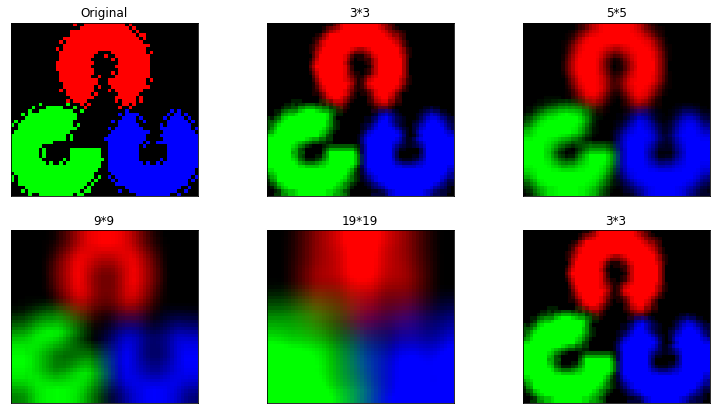

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/12/opencv-logo.png')

plt.figure(figsize=(13,7))
plt.subplot(231)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([]), plt.yticks([])

kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(232),
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('3*3')
plt.xticks([]), plt.yticks([])

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(233)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('5*5')
plt.xticks([]), plt.yticks([])

kernel = np.ones((10,10),np.float32)/100
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(234)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('9*9')
plt.xticks([]), plt.yticks([])

kernel = np.ones((20,20),np.float32)/300
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(235)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('19*19')
plt.xticks([]), plt.yticks([])

blur = cv2.blur(img,(3,3)) # blur就是做的平滑均值滤波
plt.subplot(236)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title('3*3')
plt.xticks([]), plt.yticks([])
plt.show()

##2.2 平滑中值滤波
卷积核为奇数尺寸，卷积核内部像素值从小到大排序，取中间值作为卷积输出，可以有效去除椒盐噪声![images](../images/12/08.png)
原图片左上$3*3$的9个数，做从小到大排列，然后放入卷积核，输出取中间数5为输出,然后向右移动一个像素，找到9个数，继续从小到大排列，放入卷积核，取出中间数作为输出......
![images](../images/12/09.png)

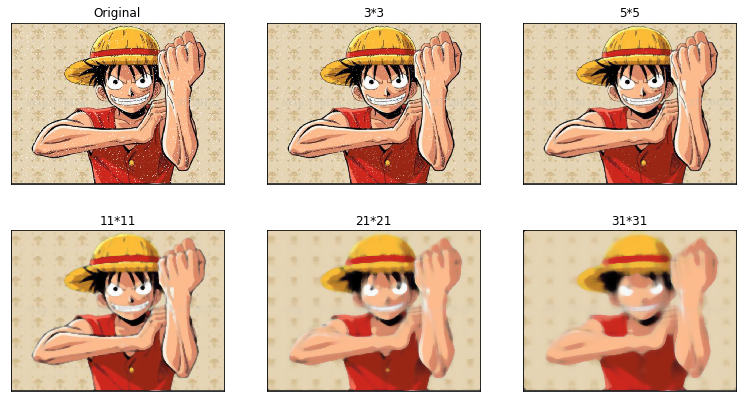

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/12/Noise.png')

plt.figure(figsize=(13,7))
plt.subplot(231)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([]), plt.yticks([])

median = cv2.medianBlur(img,3)
plt.subplot(232)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('3*3')
plt.xticks([]), plt.yticks([])

median = cv2.medianBlur(img,5)
plt.subplot(233)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('5*5')
plt.xticks([]), plt.yticks([])

median = cv2.medianBlur(img,11)
plt.subplot(234)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('11*11')
plt.xticks([]), plt.yticks([])

median = cv2.medianBlur(img,21)
plt.subplot(235)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('21*21')
plt.xticks([]), plt.yticks([])

median = cv2.medianBlur(img,31)
plt.subplot(236)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('31*31')
plt.xticks([]), plt.yticks([])
plt.show()

##2.3 平滑高斯滤波
卷积核为奇数尺寸，模拟人眼关注中心区域，有效去除高斯噪声。特点是，离关注中心越远，感受精度越模糊。公式$G_{\sigma}=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$。2D卷积可以拆分成两个相同的1D卷积
$$\begin{bmatrix}
1&2&1\\
2&4&2\\
1&2&1
\end{bmatrix}=\begin{bmatrix}
1\\
2\\
1
\end{bmatrix} * \begin{bmatrix}
1&2&1
\end{bmatrix}$$
这样可以降低计算量，2D卷积需要进行$K*K$次计算，两个相同的1D卷积需要进行$2K$次计算，公式转换如下:$$\begin{align*}G_{\sigma} &=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}\\
& =(\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{x^2}{2\sigma^2}}) \bullet (\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{y^2}{2\sigma^2}})\end{align*}$$

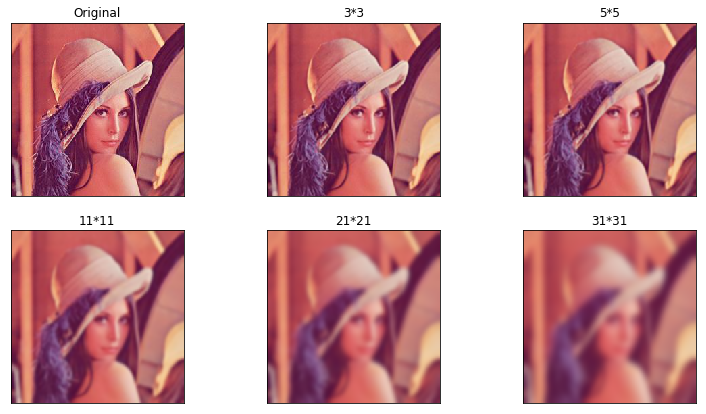

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/12/Lena.png')

plt.figure(figsize=(13,7))
plt.subplot(231)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([]), plt.yticks([])

median = cv2.GaussianBlur(img,(3,3),0)
plt.subplot(232)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('3*3')
plt.xticks([]), plt.yticks([])

median = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(233)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('5*5')
plt.xticks([]), plt.yticks([])

median = cv2.GaussianBlur(img,(11,11),0)
plt.subplot(234)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('11*11')
plt.xticks([]), plt.yticks([])

median = cv2.GaussianBlur(img,(21,21),0)
plt.subplot(235)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('21*21')
plt.xticks([]), plt.yticks([])

median = cv2.GaussianBlur(img,(31,31),0)
plt.subplot(236)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('31*31')
plt.xticks([]), plt.yticks([])
plt.show()

##2.4 平滑保边滤波-Bilateral Filtering
为了在去除噪声的时候，保持边界的完整

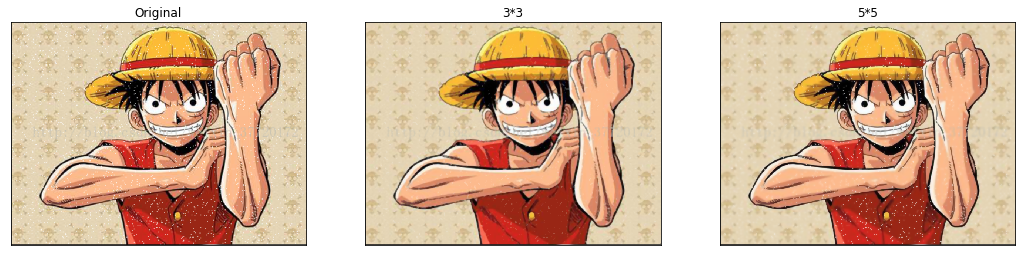

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/12/Noise.png')

plt.figure(figsize=(18,7))
plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([]), plt.yticks([])

median = cv2.medianBlur(img,5)
plt.subplot(132)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('3*3')
plt.xticks([]), plt.yticks([])

blur = cv2.bilateralFilter(img,9,75,75)
plt.subplot(133)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title('5*5')
plt.xticks([]), plt.yticks([])

plt.show()

##2.5 梯度Prewitt滤波(一阶梯度)
- 水平梯度![images](../images/12/10.png)
- 垂直梯度![images](../images/12/11.png)

##2.5 梯度Sobel滤波(一阶梯度)
- 水平梯度![images](../images/12/12.png)
- 垂直梯度![images](../images/12/13.png)

##2.6 梯度Laplacian滤波(二阶梯度)
增强边缘信息
公式$\Delta{f}=\frac{\partial^2{f}}{\partial{x}^2}+\frac{\partial^2{f}}{\partial{y}^2}$
- 团块检测：周边高于或低于中心点
- 边缘检测：像素值快速变化的区域

常用的有四种卷积核
- 1D
$$\begin{bmatrix}
1&-2&1
\end{bmatrix}$$
- 2D 4邻域
$$\begin{bmatrix}
0&1&0\\
1&-4&1\\
0&1&0
\end{bmatrix}$$
- 2D 8邻域
$$\begin{bmatrix}
1&1&1\\
1&-8&1\\
1&1&1
\end{bmatrix}$$
- $5*5$
$$\begin{bmatrix}
0&0&1&0&0\\
0&1&2&1&0\\
1&2&-16&2&1\\
0&1&2&1&0\\
0&0&1&0&0\\
\end{bmatrix}$$

它们的特点都是中心的值与周围的值的和是0
![images](../images/12/14.png)

#3 频域分析及变换

##3.1 傅里叶变换
一个信号可以有足够多个不同频率和幅值的正余弦波$A*sin(\omega{x}) + B*cos(\omega{x})$

###3.1.1 矩形波
公式$A\sum_{k=1}^{\infty}\frac{1}{k}sin(2\pi{k}t)$，我们的目的是要组合成下面的矩形波![images](../images/12/15.png)
过程如下![images](../images/12/16.png)
最下排的前两个波，组合成了第一排的第一个波，下排的前三个波，就组合成了第一排的第二个波，以此类推，等到上排的最后一个波，那就基本近似为矩形波了


###3.1.2 信号分解
![images](../images/12/17.png)

#4 金字塔

##4.1 高斯金字塔
对一张图片进行多次高斯卷积之后，图像会越来越模糊，有些像素就是多余的，那么就可以做一下降维，具体操作就是先做n次高斯卷积，然后做n次二维降采样，这就是n层金字塔.这样做的目的就是为了捕捉不同尺寸的物体。

降采样就是把偶数行偶数列扔掉，如果先做了高斯卷积之后，会避免一些信息的损失
![images](../images/12/18.png)

##4.2 拉普拉斯金字塔(Laplacian)
高频细节信息在卷积核和降采样中丢失，拉普拉斯金字塔可以保留所有层所丢失的高频信息，用于图像恢复$L_i=G_i-UP(G_{i+1}) \oplus \psi_{5*5}$。第i层的拉普拉斯就等于第i层的高斯减去对第i+1层的高斯结果进行上采样乘以一个高斯卷积核

由公式可以看出，拉普拉斯金字塔需要跟高斯金字塔配合才能进行图像恢复；如果图像不会被恢复，那么就没有必要做拉普拉斯金字塔
![images](../images/12/19.png)
红框中是做的高斯金字塔操作，绿框做的是拉普拉斯金字塔操作，蓝框做的是图片的恢复操作。其中，红框和蓝框中的三张图片是一样的


#5 模板匹配

##5.1 模板图片匹配 VS 卷积
- 作用：同尺度目标检测
- 模板：真是图片 VS 卷积核
- 操作：使用模板图片扫描整个图片 VS 卷积扫描
- 匹配结果：相似度量 VS 权重相加。模板匹配是使用一副模板图，在原图中找到相似的部分。所以肯定需要用到相似距离的计算，主要有六种：欧氏距离、标准化欧氏距离、相关、标准化相关、去均值相关，标准化去均值相关
![images](../images/12/20.png)

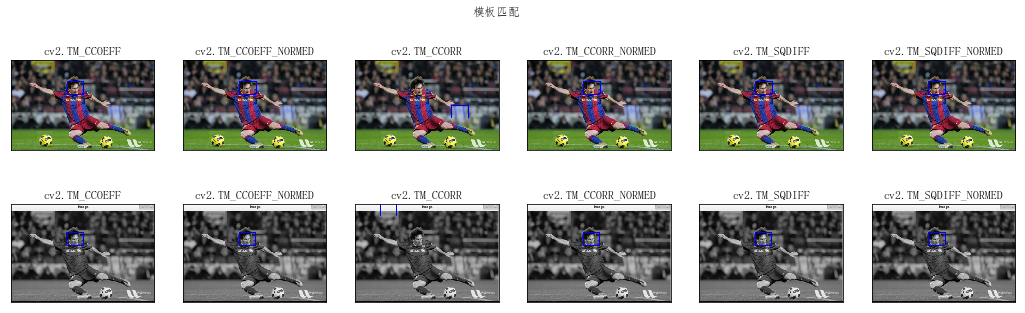

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

img = cv2.imread('images/12/messi1.jpg')
img2 = img.copy()
template = cv2.imread('images/12/template.jpg')
w, h = template.shape[:-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
plt.figure(figsize=(18,5), facecolor='w')
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
for i, meth in enumerate(methods):
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(2,6, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(meth)
    plt.xticks([]), plt.yticks([])

img = cv2.imread('images/12/messi5.jpg')
img2 = img.copy()
for i, meth in enumerate(methods):
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(2,6, i+7)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(meth)
    plt.xticks([]), plt.yticks([])
    
plt.suptitle(u'模板匹配')
plt.show()